# Contents:
This notebook contains the following:
1. Generation of random graphs
2. Comparison between the actual data and the other networks
    - Degree distribution
    - Centrality measures
    - Clustering coefficients
    - Fraction infected for a disease outbreak
    - Overall average attack rate
3. Results and Conclusion

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
from matplotlib.pyplot import cm
import random
from scipy.stats import ttest_ind

### Generate random graphs having the same number of nodes and edges as the actual data
I am generating 10 different random graphs having the same number of vertices (1460) and edges (974) to get a better understanding of how good or bad these random graphs are compared to the actual network.

In [2]:
for i in range(1, 11):
    
    #generate a G(n,m) type random graph with n = 1460 and m = 974
    
    g = nx.gnm_random_graph(1460, 974)
    
    # save each graph in edge list format 
    
    with open('random_graph_' + str(i) + '.txt', 'w') as fout:
        for e in g.edges():
            fout.write(str(e[0]) + ' ' + str(e[1]) + '\n')

### Read the networks - actual, representative and random - to compare the basic network measures.
1. Average degree
2. Closeness centrality
3. Betweenness centrality
4. Clustering coefficients

In [3]:
school = nx.read_edgelist('school.txt', nodetype = int)
fmh = nx.read_edgelist('fmh.txt', nodetype = int)

print('average degree school:', round(len(school.edges())/len(school.nodes()), 3))
print('average degree FMH:', round(len(fmh.edges())/len(fmh.nodes()), 3))

for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    print('average degree RG'+str(i)+':', round(len(h.edges())/len(h.nodes()), 3))

average degree school: 1.039
average degree FMH: 1.039
average degree RG1: 0.889
average degree RG2: 0.899
average degree RG3: 0.906
average degree RG4: 0.904
average degree RG5: 0.925
average degree RG6: 0.917
average degree RG7: 0.909
average degree RG8: 0.915
average degree RG9: 0.895
average degree RG10: 0.906


Text(0,0.5,'$frequency$')

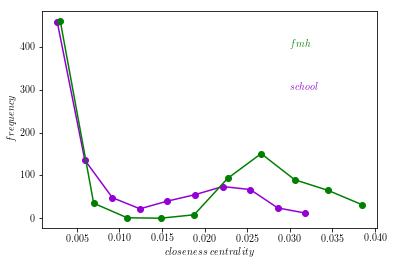

In [4]:
csch = nx.closeness_centrality(school) 
[ys, bs] = np.histogram(list(csch.values()))
xs = [(bs[j] + bs[j+1])/2 for j in range(len(bs)-1)]


cfmh = nx.closeness_centrality(fmh) 
[yf, bf] = np.histogram(list(cfmh.values()))
xf = [(bf[j] + bf[j+1])/2 for j in range(len(bf)-1)]

plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.plot(xf, yf, 'o-', color = 'green')
plt.text(0.03, 400, '$fmh$', style ='italic', color = 'green')
plt.text(0.03, 300, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$closeness$ $centrality$')
plt.ylabel("$frequency$")

Text(0,0.5,'$frequency$')

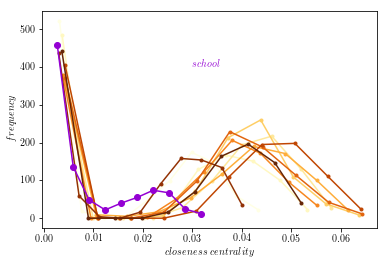

In [5]:
colours = cm.YlOrBr(np.linspace(0,1,10))

for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    cc = nx.closeness_centrality(h) 
    [yh, bh] = np.histogram(list(cc.values()))
    xh = [(bh[j] + bh[j+1])/2 for j in range(len(bh)-1)]
    plt.plot(xh, yh, '.-', color = colours[i-1])
    
plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.text(0.03, 400, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$closeness$ $centrality$')
plt.ylabel("$frequency$")

Text(0,0.5,'$frequency$')

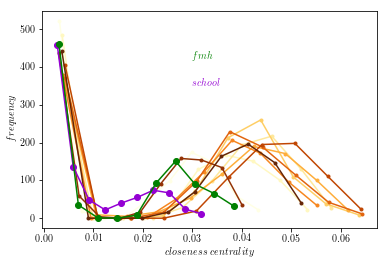

In [6]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    cc = nx.closeness_centrality(h) 
    [yh, bh] = np.histogram(list(cc.values()))
    xh = [(bh[j] + bh[j+1])/2 for j in range(len(bh)-1)]
    plt.plot(xh, yh, '.-', color = colours[i-1])
    
plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.plot(xf, yf, 'o-', color = 'green')
plt.text(0.03, 420, '$fmh$', style ='italic', color = 'green')
plt.text(0.03, 350, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$closeness$ $centrality$')
plt.ylabel("$frequency$")

***Plots suggest closeness centrality for the representative network appear closer to the results for the actual network compared to the random graphs. Although the representative network behaves close to one of the random networks.***

Text(0,0.5,'$frequency$')

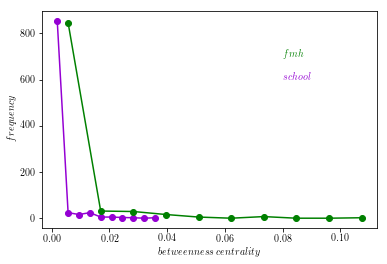

In [7]:
csch = nx.betweenness_centrality(school) 
[ys, bs] = np.histogram(list(csch.values()))
xs = [(bs[j] + bs[j+1])/2 for j in range(len(bs)-1)]


cfmh = nx.betweenness_centrality(fmh) 
[yf, bf] = np.histogram(list(cfmh.values()))
xf = [(bf[j] + bf[j+1])/2 for j in range(len(bf)-1)]

plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.plot(xf, yf, 'o-', color = 'green')
plt.text(0.08, 700, '$fmh$', style ='italic', color = 'green')
plt.text(0.08, 600, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$betweenness$ $centrality$')
plt.ylabel("$frequency$")

Text(0,0.5,'$frequency$')

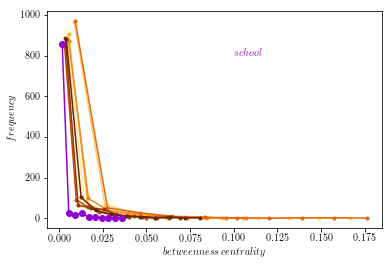

In [8]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    cc = nx.betweenness_centrality(h) 
    [yh, bh] = np.histogram(list(cc.values()))
    xh = [(bh[j] + bh[j+1])/2 for j in range(len(bh)-1)]
    plt.plot(xh, yh, '.-', color = colours[i-1])
    
plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.text(0.1, 800, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$betweenness$ $centrality$')
plt.ylabel("$frequency$")

Text(0,0.5,'$frequency$')

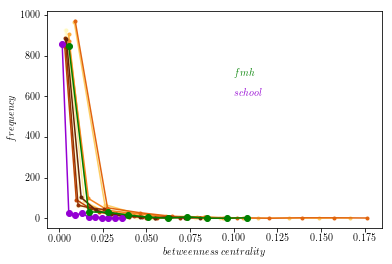

In [9]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    cc = nx.betweenness_centrality(h) 
    [yh, bh] = np.histogram(list(cc.values()))
    xh = [(bh[j] + bh[j+1])/2 for j in range(len(bh)-1)]
    plt.plot(xh, yh, '.-', color = colours[i-1])
    
plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.plot(xf, yf, 'o-', color = 'green')
plt.text(0.1, 700, '$fmh$', style ='italic', color = 'green')
plt.text(0.1, 600, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$betweenness$ $centrality$')
plt.ylabel("$frequency$")

***Plots suggest betweenness centrality do not suggest any significant insights. In fact the representative network resembles closely to the plots of the random networks.***

Text(0,0.5,'$frequency$')

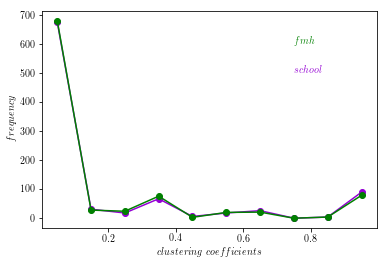

In [10]:
csch = nx.clustering(school) 
[ys, bs] = np.histogram(list(csch.values()))
xs = [(bs[j] + bs[j+1])/2 for j in range(len(bs)-1)]


cfmh = nx.clustering(fmh) 
[yf, bf] = np.histogram(list(cfmh.values()))
xf = [(bf[j] + bf[j+1])/2 for j in range(len(bf)-1)]

plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.plot(xf, yf, 'o-', color = 'green')
plt.text(0.75, 600, '$fmh$', style ='italic', color = 'green')
plt.text(0.75, 500, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$clustering$ $coefficients$')
plt.ylabel("$frequency$")

Text(0,0.5,'$frequency$')

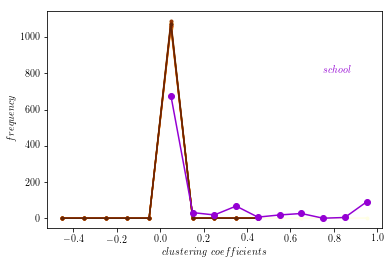

In [11]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    cc = nx.clustering(h) 
    [yh, bh] = np.histogram(list(cc.values()))
    xh = [(bh[j] + bh[j+1])/2 for j in range(len(bh)-1)]
    plt.plot(xh, yh, '.-', color = colours[i-1])
    
plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.text(0.75, 800, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$clustering$ $coefficients$')
plt.ylabel("$frequency$")

Text(0,0.5,'$frequency$')

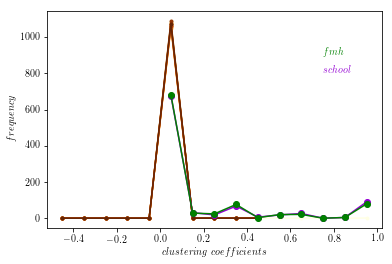

In [12]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    cc = nx.clustering(h) 
    [yh, bh] = np.histogram(list(cc.values()))
    xh = [(bh[j] + bh[j+1])/2 for j in range(len(bh)-1)]
    plt.plot(xh, yh, '.-', color = colours[i-1])
    
plt.plot(xs, ys, 'o-', color = 'darkviolet')
plt.plot(xf, yf, 'o-', color = 'green')
plt.text(0.75, 900, '$fmh$', style ='italic', color = 'green')
plt.text(0.75, 800, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$clustering$ $coefficients$')
plt.ylabel("$frequency$")

***Plots suggest clustering coefficients clearly suggest that the results for the representative network imitates closely the actual network and the random graphs are no where near. This suggests that the clustering is captured to a good extent while generating the representative networks. It is not surprising that the random graphs have no clusters because they were not constarined for that while generation.***

### Compare the degree distribution for actual data and the representative network.

In [13]:
school_degree_sequence = [d for n, d in school.degree()]
fmh_degree_sequence = [d for n, d in fmh.degree()]

Text(0,0.5,'$\\#$  $of$ $nodes$')

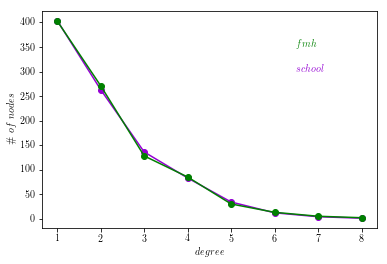

In [14]:
school_degree_count = Counter(sorted(school_degree_sequence))
sch_deg, sch_cnt = zip(*school_degree_count.items())

fmh_degree_count = Counter(sorted(fmh_degree_sequence))
fmh_deg, fmh_cnt = zip(*fmh_degree_count.items())

plt.plot(sch_deg, sch_cnt, 'o-', color = 'darkviolet')
plt.plot(fmh_deg, fmh_cnt, 'o-', color='green')
plt.text(6.5, 350, '$fmh$', style ='italic', color = 'green')
plt.text(6.5, 300, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$degree$')
plt.ylabel('$\#$  $of$ $nodes$')

### Compare the degree distribution of the actual data to the random graphs

Text(0,0.5,'$\\#$  $of$ $nodes$')

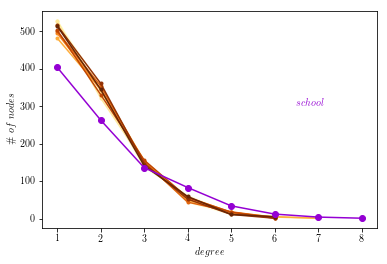

In [15]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    degree_sequence = [d for n, d in h.degree()]
    degree_count = Counter(sorted(degree_sequence))
    deg, cnt = zip(*degree_count.items())
    plt.plot(deg, cnt, '.-', color = colours[i-1])
    
plt.plot(sch_deg, sch_cnt, 'o-', color = 'darkviolet')
plt.text(6.5, 300, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$degree$')
plt.ylabel('$\#$  $of$ $nodes$')

Text(0,0.5,'$\\#$  $of$ $nodes$')

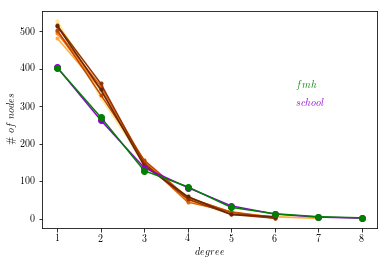

In [16]:
for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    degree_sequence = [d for n, d in h.degree()]
    degree_count = Counter(sorted(degree_sequence))
    deg, cnt = zip(*degree_count.items())
    plt.plot(deg, cnt, '.-', color = colours[i-1])
    
plt.plot(sch_deg, sch_cnt, 'o-', color = 'darkviolet')
plt.plot(fmh_deg, fmh_cnt, 'o-', color='green')
plt.text(6.5, 350, '$fmh$', style ='italic', color = 'green')
plt.text(6.5, 300, '$school$', style ='italic', color = 'darkviolet')
plt.xlabel('$degree$')
plt.ylabel('$\#$  $of$ $nodes$')

***The degree distribution plot suggests that representative network captures the degrees of the actual network to a good extent, very similar to each other. The results for the random networks look very different.***

#### Uncomment the following to save plots as a pdf

In [ ]:
#plt.figure(figsize=(15, 15))

#plt.plot(sch_deg, sch_cnt, 'o-', color = 'darkviolet', lw = 4, markersize = 15)
#plt.plot(fmh_deg, fmh_cnt, 'o-', color='green', lw = 4, markersize = 15)

#for i in range(1, 11):
#    h = nx.read_edgelist('random_graph_' + str(i) + '.txt')
#    degree_sequence = [d for n, d in h.degree()]
#    degree_count = Counter(sorted(degree_sequence))
#    deg, cnt = zip(*degree_count.items())
#    plt.plot(deg, cnt, '.-', color = colours[i-1], lw = 3)


#plt.text(6.5, 350, '$fmh$', style ='italic', color = 'green',fontsize = 25)
#plt.text(6.5, 450, '$school$', style ='italic', color = 'darkviolet',fontsize = 25)
#axis_font = {'size':'35', 'color':'black'}
#axis_tick_font = {'size':'25', 'color':'black'}
#plt.xlabel('$degree$', **axis_font)
#plt.ylabel("$\#$  $of$ $nodes$", **axis_font)
#plt.xticks(**axis_tick_font)
#plt.yticks(**axis_tick_font)
#plt.savefig('degree_rng.pdf')

### Simulate a S-I-R disease model on the networks
This will give the fraction of infected individuals and the overall attack rate.

In [17]:
def epi_main(num, graph, inf_rate, rec_rate):


    fr_inf = []
    att_rate = []

    init = 1   #no. of individuals infected at time t = 0

    for m in range(0, num):
        n_infected = [1]
        n_susceptible = [graph.number_of_nodes()-1]
        new_infected = []
        n_removed = [0]

        state = [0] * (max(graph.nodes())+1)

        # to not run into errors if all the node ids are not continuous values
        state[0] = 5
        for i in range(len(state)):
            if i not in graph.nodes():
                state[i] = 5

        infected = random.sample((graph.nodes()), init)
        #    print(infected)

        for i in range(len(infected)):
            state[infected[i]] = 1

        while len(infected) > 0:

        ### Spreading infection

            for j in infected:
                neighbors = graph.neighbors(j)

                for k in neighbors:
                    if state[k] == 0 and random.random() < inf_rate:
                        state[k] = 1
                        new_infected.append(k)

            ### Recovering from infection
            for k in infected[:]:             #need to access new changed list every time, so slice assignment
                if random.random() < rec_rate:
                    state[k] = 2
                    infected.remove(k)



            infected = new_infected + infected
            new_infected = []
            n_infected.append(state.count(1))
            n_susceptible.append(state.count(0))
            n_removed.append(state.count(2))

        # gives the fraction infected
        fr_inf.append(list(n_infected[t]/graph.number_of_nodes() for t in range(len(n_infected)))) 
        
        # gives the attack rate
        att_rate.append(n_removed[-1]/graph.number_of_nodes()) 
        
    return att_rate, fr_inf

### Compare the results on random networks and actual data

average attack rate for probability of transmission, 0.8 for random graphs =  0.0517
std. dev. sch 0.0002
average attack rate for probability of transmission, 0.8 for school =  0.0272
std. dev. sch 0.0005


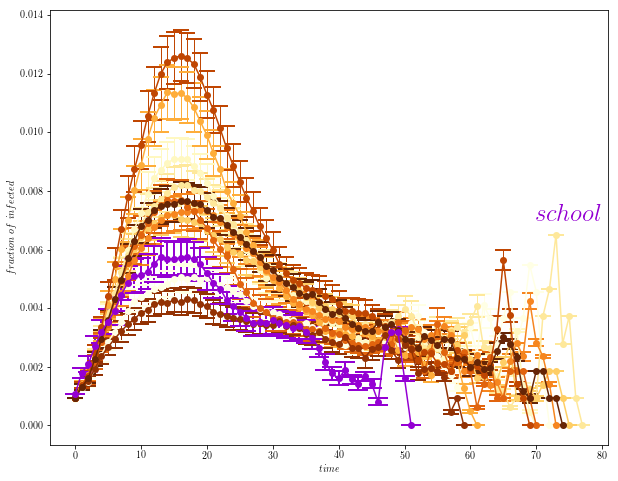

In [18]:
num_sim = 10000

inf_rate = 0.8
rec_rate = 1

rng_att_rate = []

sch_att_rate, sch_inf = epi_main(num_sim, school, inf_rate, rec_rate)

plt.figure(figsize=(10, 8))

for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    ar, rng_inf = epi_main(num_sim, h, inf_rate, rec_rate)
    rng_att_rate.append(ar)
    
    rng_inf_mean = [np.mean([x[i] for x in rng_inf if len(x) > i]) for i in range(len(max(rng_inf, key = len)))]
    strg = [np.std([x[i] for x in rng_inf if len(x) > i]) for i in range(len(max(rng_inf, key = len)))]

    plt.errorbar(range(len(rng_inf_mean)), rng_inf_mean, yerr = strg/np.sqrt(len(rng_inf_mean)), 
             color = colours[i-1], markersize = 5, ecolor = colours[i-1],
             fmt='-o', markeredgewidth = 2, capsize = 8, elinewidth=1)

av_atr_rng = [np.mean(rng_att_rate[i]) for i in range(len(rng_att_rate))]

print('average attack rate for probability of transmission, 0.8 for random graphs = ', round(np.mean(av_atr_rng), 4))
print('std. dev. sch', round(np.std(av_atr_rng)/np.sqrt(num_sim),4))    



sch_inf_mean = [np.mean([x[i] for x in sch_inf if len(x) > i]) for i in range(len(max(sch_inf, key = len)))]
sts = [np.std([x[i] for x in sch_inf if len(x) > i]) for i in range(len(max(sch_inf, key = len)))]

plt.errorbar(range(len(sch_inf_mean)), sch_inf_mean, yerr = sts/np.sqrt(len(sch_inf_mean)), 
             color = 'darkviolet', markersize = 5, ecolor = 'darkviolet',
             fmt='-o', markeredgewidth=2, capsize=10, elinewidth=2)

plt.text(70, 0.007, '$school$', style ='italic', color = 'darkviolet', fontsize = 25)
plt.xlabel('$time$')
plt.ylabel('$fraction$  $of$ $infected$')

print('average attack rate for probability of transmission, 0.8 for school = ', round(np.mean(sch_att_rate),4))
print('std. dev. sch', round(np.std(sch_att_rate)/np.sqrt(num_sim),4))

In [19]:
num_sim = 10000

inf_rate = 0.8
rec_rate = 1


sch_att_rate, sch_inf = epi_main(num_sim, school, inf_rate, rec_rate)
fmh_att_rate, fmh_inf = epi_main(num_sim, fmh, inf_rate, rec_rate)

print('average attack rate for probability of transmission, 0.8 for school = ', round(np.mean(sch_att_rate),4))
print('std. dev. sch', round(np.std(sch_att_rate)/np.sqrt(num_sim),4))

print('average attack rate for probability of transmission, 0.8 for FMH = ', round(np.mean(fmh_att_rate),4))
print('std. dev. FMH', round(np.std(fmh_att_rate)/np.sqrt(num_sim),4))

average attack rate for probability of transmission, 0.8 for school =  0.028
std. dev. sch 0.0005
average attack rate for probability of transmission, 0.8 for FMH =  0.0394
std. dev. FMH 0.0007


Text(0,0.5,'$fraction$  $of$ $infected$')

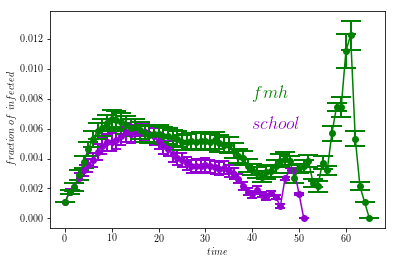

In [25]:
fmh_inf_mean = [np.mean([x[i] for x in fmh_inf if len(x) > i]) for i in range(len(max(fmh_inf, key = len)))]
stf = [np.std([x[i] for x in fmh_inf if len(x) > i]) for i in range(len(max(fmh_inf, key = len)))]


plt.errorbar(range(len(sch_inf_mean)), sch_inf_mean, yerr = sts/np.sqrt(len(sch_inf_mean)),
             color = 'darkviolet', markersize = 5, ecolor = 'darkviolet',
             fmt='-o', markeredgewidth=2, capsize=5, elinewidth=2)

plt.errorbar(range(len(fmh_inf_mean)), fmh_inf_mean, yerr = stf/np.sqrt(len(fmh_inf_mean)), 
             color = 'green', markersize = 5, ecolor = 'green',
             fmt='-o', markeredgewidth=2, capsize=10, elinewidth=2)

plt.text(40, 0.008, '$fmh$', style ='italic', color = 'green', fontsize = 18)
plt.text(40, 0.006, '$school$', style ='italic', color = 'darkviolet', fontsize = 18)
plt.xlabel('$time$')
plt.ylabel('$fraction$  $of$ $infected$')

***t-test for the overall attack rate***

In [26]:
ttest_sch_fmh = ttest_ind(sch_att_rate, fmh_att_rate)
ttest_sch_rng = ttest_ind(sch_att_rate, av_atr_rng)

print('t-test value for school and FMH = ', ttest_sch_fmh[0], 'with p-value = ', ttest_sch_fmh[1])
print('t-test value for school and random graphs = ', ttest_sch_rng[0], 'with p-value = ', ttest_sch_rng[1])

t-test value for school and FMH =  -13.8435796724 with p-value =  2.20567102796e-43
t-test value for school and random graphs =  -1.52487649181 with p-value =  0.12732150457


## Conclusions:
### 1. Conclusion from network measure Plots:
This means that the local structure has been well represented by the 'FMH' network, implying that the number of neighbours for each individual matches the actual scenario. The random networks, being random are unable to represent the real scenario of interactions between the students.
### 2. Conclusion from SIR simulations:
These plots represent that disease outbreak in actual network resemble much closer to the random networks, compared to the representative one even though the random networks are generated completely random and do not imitate the local structure or any of the features of the actual network.

The evolution of the disease outbreak over the time range plot for actual and representative networks suggest the representative network over estimates the outbreak and also the duration of the outbreak.
### 3. Conclusion from t-test:
The t-test value for the overall attack rate between actual and representative network shows a huge difference with a significantly low p-value. The t-test values for the overall attack rate between actual and random networks show not that much of a big difference with p-value of ~0.5. The low p-value for the actual and the representative scenario leads us to reject the hypothesis that a network model capturing the underying social interactions the best gives the best prediction for disease outbreak.